#  Name : Md. Masum Billah   "  "  Id : 21225103383



In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Undirected graph (city roads)
G_city = nx.Graph()
undirected_edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('D', 'E'),('E', 'F'), ('F', 'G'), ('G', 'H')]
G_city.add_edges_from(undirected_edges)

# Directed graph (drone roads)
G_drone = nx.DiGraph()
directed_edges = [('C', 'D'), ('D', 'F'), ('F', 'H'), ('H', 'C')]
G_drone.add_edges_from(directed_edges)

**Q1: Visualize both graphs**

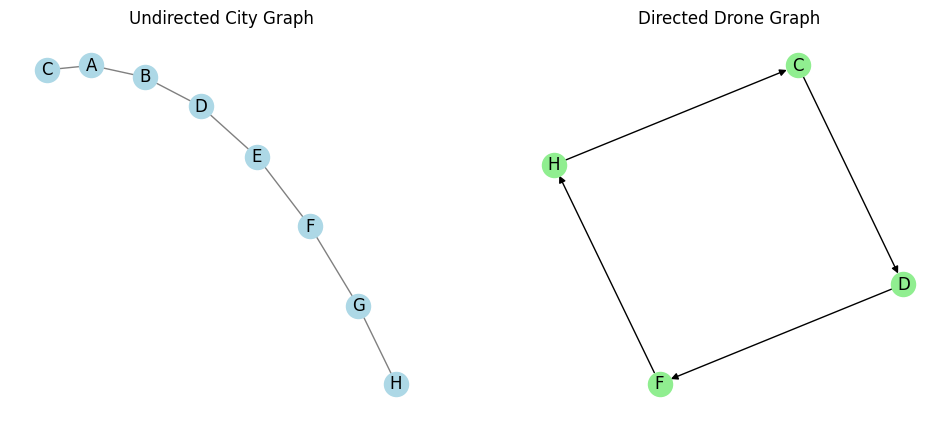

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
nx.draw(G_city, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Undirected City Graph")

plt.subplot(1, 2, 2)
nx.draw(G_drone, with_labels=True, node_color='lightgreen', edge_color='black', arrows=True)
plt.title("Directed Drone Graph")

plt.show()

**Q2: Shortest path A to H (city graph)**

In [17]:

# Q2: Shortest path A to H (city graph)

# Find shortest path from A to H
shortest_path_A_H = nx.shortest_path(G_city, source='A', target='H')
path_length = nx.shortest_path_length(G_city, source='A', target='H')

print("Shortest path from A to H:", shortest_path_A_H)
print("Path length:", path_length)


Shortest path from A to H: ['A', 'B', 'D', 'E', 'F', 'G', 'H']
Path length: 6


**Q3: Check if the city graph is connected**

In [18]:
#Q3: Check if the city graph is connected

is_connected = nx.is_connected(G_city)
print("Is city graph connected?", is_connected)


if is_connected:
    connected_path = list(nx.node_connected_component(G_city, "A"))
    print("Connected component including 'A':", connected_path)
else:
    components = list(nx.connected_components(G_city))
    print("Disconnected components:", components)

Is city graph connected? True
Connected component including 'A': ['E', 'C', 'G', 'F', 'H', 'B', 'D', 'A']


**Q4: Locations reachable from C by drone only**

In [19]:
#Q4: Locations reachable from C by drone only
reachable_from_C = list(nx.descendants(G_drone, 'C'))
reachable_count = len(reachable_from_C)

print("Locations reachable from C (drone only):", reachable_from_C)
print("Number of reachable Edges:", reachable_count)

Locations reachable from C (drone only): ['D', 'F', 'H']
Number of reachable locations: 3


**Q5: Detect cycle in drone graph**

In [16]:
#Q5: Detect cycle in drone graph
cycles = list(nx.simple_cycles(G_drone))
has_cycle = len(cycles) > 0

print("Drone graph has cycle?", has_cycle)
print("Cycles found:", cycles)

Drone graph has cycle? True
Cycles found: [['D', 'F', 'H', 'C']]


**Q6: Add weights (distances in km)**

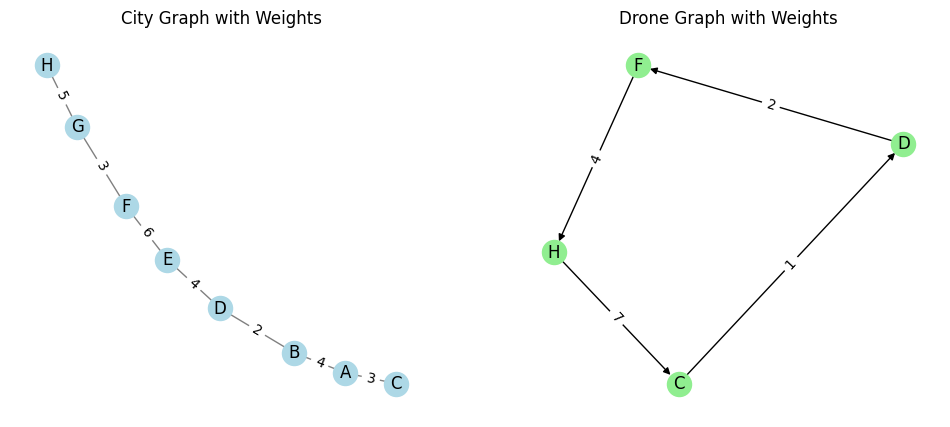

In [34]:
#Q6: Add weights (distances in km)
# Weights (distances in km)
weights = {
    ('A', 'B'): 4, ('A', 'C'): 3, ('B', 'D'): 2, ('D', 'E'): 4,('E', 'F'): 6, ('F', 'G'): 3, ('G', 'H'): 5,('C', 'D'): 1, ('D', 'F'): 2, ('F', 'H'): 4, ('H', 'C'): 7}

# Assign weights to graphs
nx.set_edge_attributes(G_city, {k: v for k, v in weights.items() if k in G_city.edges()}, 'weight')
nx.set_edge_attributes(G_drone, {k: v for k, v in weights.items() if k in G_drone.edges()}, 'weight')

plt.figure(figsize=(12, 5))

# Draw City Graph (Undirected)
plt.subplot(1, 2, 1)
pos1 = nx.spring_layout(G_city)
nx.draw(G_city, pos1, with_labels=True, node_color='lightblue', edge_color='gray')
edge_labels_city = nx.get_edge_attributes(G_city, 'weight')
nx.draw_networkx_edge_labels(G_city, pos1, edge_labels=edge_labels_city)
plt.title("City Graph with Weights")

# Draw Drone Graph (Directed)
plt.subplot(1, 2, 2)
pos2 = nx.spring_layout(G_drone)
nx.draw(G_drone, pos2, with_labels=True, node_color='lightgreen', edge_color='black', arrows=True)
edge_labels_drone = nx.get_edge_attributes(G_drone, 'weight')
nx.draw_networkx_edge_labels(G_drone, pos2, edge_labels=edge_labels_drone)
plt.title("Drone Graph with Weights")

plt.show()

**Q7: Minimum distance path from A to G (city graph)**

In [24]:
#Q7: Minimum distance path from A to G (city graph)

min_dist_path_A_G = nx.shortest_path(G_city, source='A', target='G', weight='weight')
min_dist_A_G_length = nx.shortest_path_length(G_city, source='A', target='G', weight='weight')

print("Minimum distance path from A to G:", min_dist_path_A_G)
print("Total distance:", min_dist_A_G_length, "km")

Minimum distance path from A to G: ['A', 'B', 'D', 'E', 'F', 'G']
Total distance: 19 km


**Q8: Node with highest degree**

In [26]:
#Q8: Node with highest degree
highest_degree_node = max(G_city.degree, key=lambda x: x[1])
print("Node with highest degree:", highest_degree_node)

Node with highest degree: ('A', 2)


**Q9: Adjacency matrix of undirected graph**

In [35]:
#Q9: Adjacency matrix of undirected graph
adj_matrix = nx.to_numpy_array(G_city, nodelist=sorted(G_city.nodes()), dtype=int)
adj_df = pd.DataFrame(adj_matrix, columns=sorted(G_city.nodes()), index=sorted(G_city.nodes()))

print("Adjacency Matrix as DataFrame (Integers):")
print(adj_df)

Adjacency Matrix as DataFrame (Integers):
   A  B  C  D  E  F  G  H
A  0  4  3  0  0  0  0  0
B  4  0  0  2  0  0  0  0
C  3  0  0  0  0  0  0  0
D  0  2  0  0  4  0  0  0
E  0  0  0  4  0  6  0  0
F  0  0  0  0  6  0  3  0
G  0  0  0  0  0  3  0  5
H  0  0  0  0  0  0  5  0


**Q10: Nodes with even degree**

In [37]:
#Q10: Nodes with even degree
even_degree_nodes = [node for node, deg in G_city.degree if deg % 2 == 0]
print("Nodes with even degree:", even_degree_nodes)

Nodes with even degree: ['A', 'B', 'D', 'E', 'F', 'G']


**Q11: Number of paths of length 2 from A to G**

In [39]:
#Q11: Number of paths of length 2 from A to G

adj = nx.to_numpy_array(G_city, nodelist=sorted(G_city.nodes()))
node_index = {node: idx for idx, node in enumerate(sorted(G_city.nodes()))}
adj_squared = np.linalg.matrix_power(adj, 2)
paths_A_G_length2 = int(adj_squared[node_index['A'], node_index['G']])
print("Number of paths of length 2 from A to G:", paths_A_G_length2)

Number of paths of length 2 from A to G: 0
